2023-05-30 07:43:22.646699: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -15.0|  6.812e-01|  4.532e-01|           59403|     5.444e-01|     3.651e-01|              47850|   5.494e-01|   3.692e-01|            48398|      1.184e+03|
|--------------------------------------------------------------------------------------------------------------------------------------------

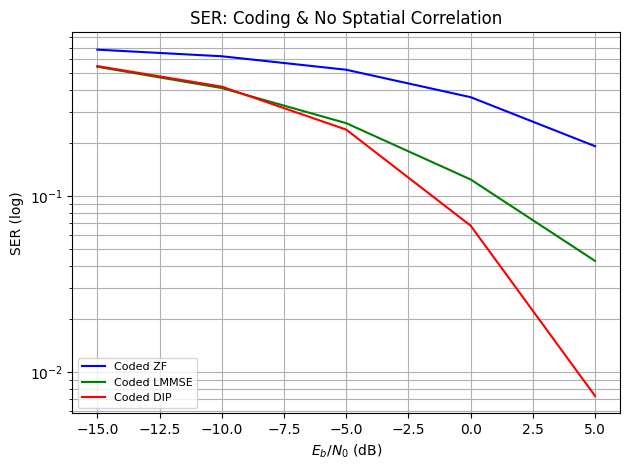

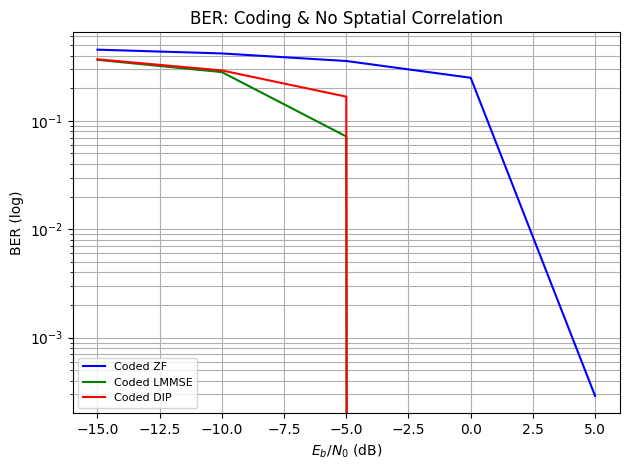

(array([-15., -10.,  -5.,   0.,   5.]),
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.68121338, 0.62473297, 0.52365112, 0.36557007, 0.19241333])>,
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.54439545, 0.41204071, 0.26013947, 0.12445068, 0.04283905])>,
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.5493927 , 0.41964722, 0.23908997, 0.06796265, 0.00730896])>)

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from YCodeNCorr import ycodencorr

### Simulation
Block_Length = 512         # Block Length (k)
NUM_BITS_PER_SYMBOL = 2    # Mapping: 4QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 8             # Transmit Antennas
NUM_RX_ANT = 8             # Receive Antennas
CODERATE = 0.5             # Code Rate

NUM_DATA_GROUP = 1         # Number of Data Group
BATCH_SIZE = 32            # Number of Parallelly Processed Batches
EBN0_DB_MIN = -15.0        # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 5.0          # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 5        # EBNO Points

model_ycodencorr = ycodencorr(Block_Length, 
                                NUM_BITS_PER_SYMBOL,
                                CONSTELLATION_TYPE,
                                DEMAPPING_METHOD,
                                NUM_RX_ANT,
                                NUM_TX_ANT,
                                CODERATE)

model_ycodencorr(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)